In [14]:
# initialisations
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
sns.set(
    palette="Paired",
    style='whitegrid',
    color_codes=True,
    rc={"figure.figsize": (12,8)},
)

In [16]:
url='https://drive.google.com/file/d/1kT70XbuamwT68SnK60My4ff08Y03Ce-t/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
adult_df = pd.read_csv(url)

## Descriptive Stats

In [17]:
adult_df.shape

(48842, 15)

In [18]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
adult_df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [20]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
adult_df.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## Univariate Analysis

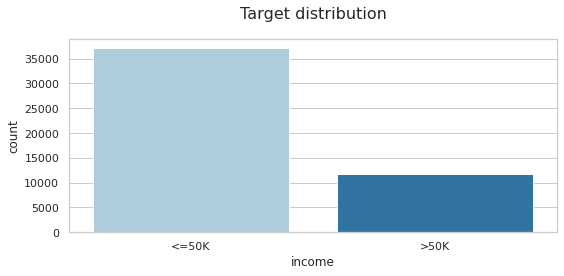

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=adult_df['income'], ax=ax)

abs_vals = adult_df['income'].value_counts()
rel_vals = adult_df['income'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

#ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

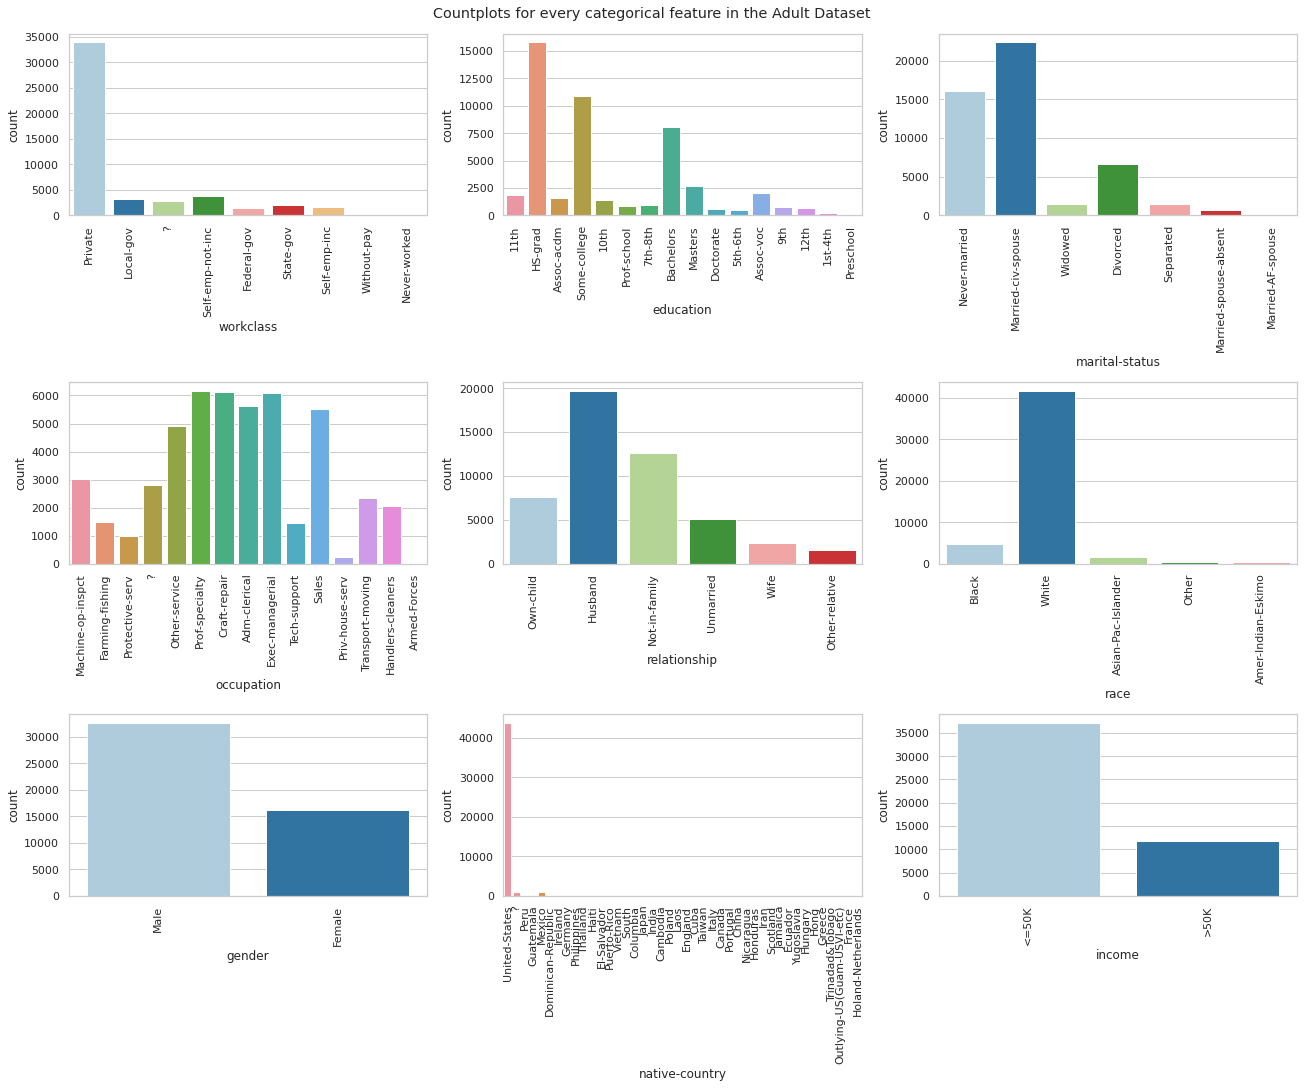

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15), constrained_layout=True)


fig.suptitle('Countplots for every categorical feature in the Adult Dataset')

sns.countplot(ax=axes[0, 0], data=adult_df, x='workclass')
sns.countplot(ax=axes[0, 1], data=adult_df, x='education')
sns.countplot(ax=axes[0, 2], data=adult_df, x='marital-status')
sns.countplot(ax=axes[1, 0], data=adult_df, x='occupation')
sns.countplot(ax=axes[1, 1], data=adult_df, x='relationship')
sns.countplot(ax=axes[1, 2], data=adult_df, x='race')
sns.countplot(ax=axes[2, 0], data=adult_df, x='gender')
sns.countplot(ax=axes[2, 1], data=adult_df, x='native-country')
sns.countplot(ax=axes[2, 2], data=adult_df, x='income')

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

## Bivariate Analysis

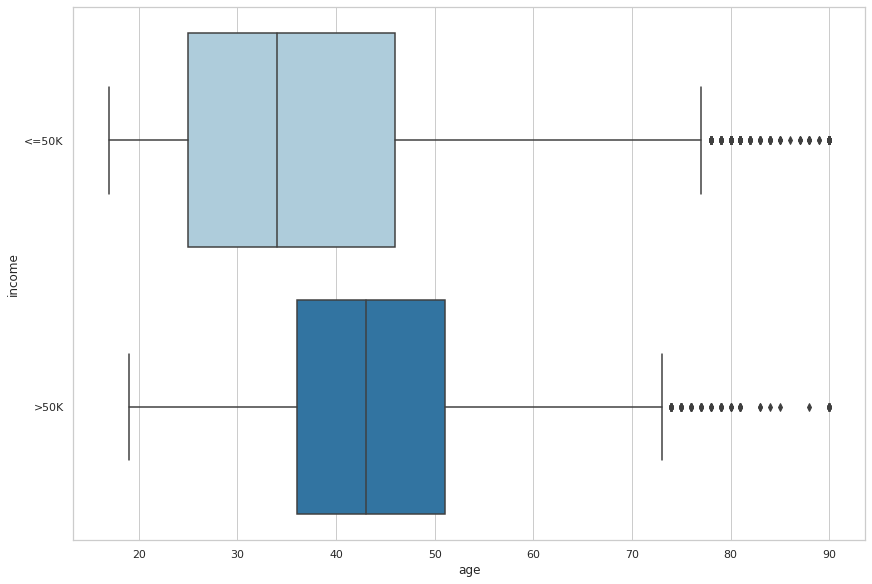

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)

sns.boxplot(ax=axes, x='age', y='income', data=adult_df)\

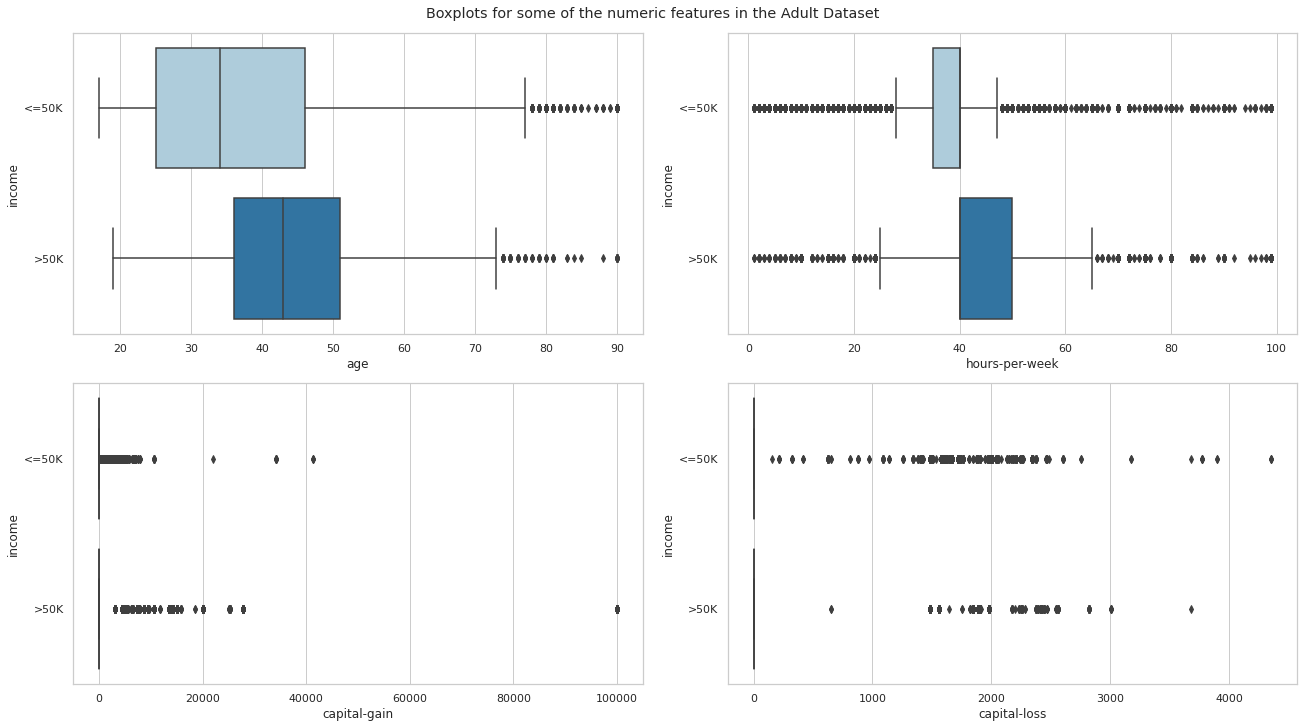

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10), constrained_layout=True)


fig.suptitle('Boxplots for some of the numeric features in the Adult Dataset')

sns.boxplot(ax=axes[0,0], x='age', y='income', data=adult_df)
sns.boxplot(ax=axes[0,1], x='hours-per-week', y='income', data=adult_df)
sns.boxplot(ax=axes[1,0], x='capital-gain', y='income', data=adult_df)
sns.boxplot(ax=axes[1,1], x='capital-loss', y='income', data=adult_df)

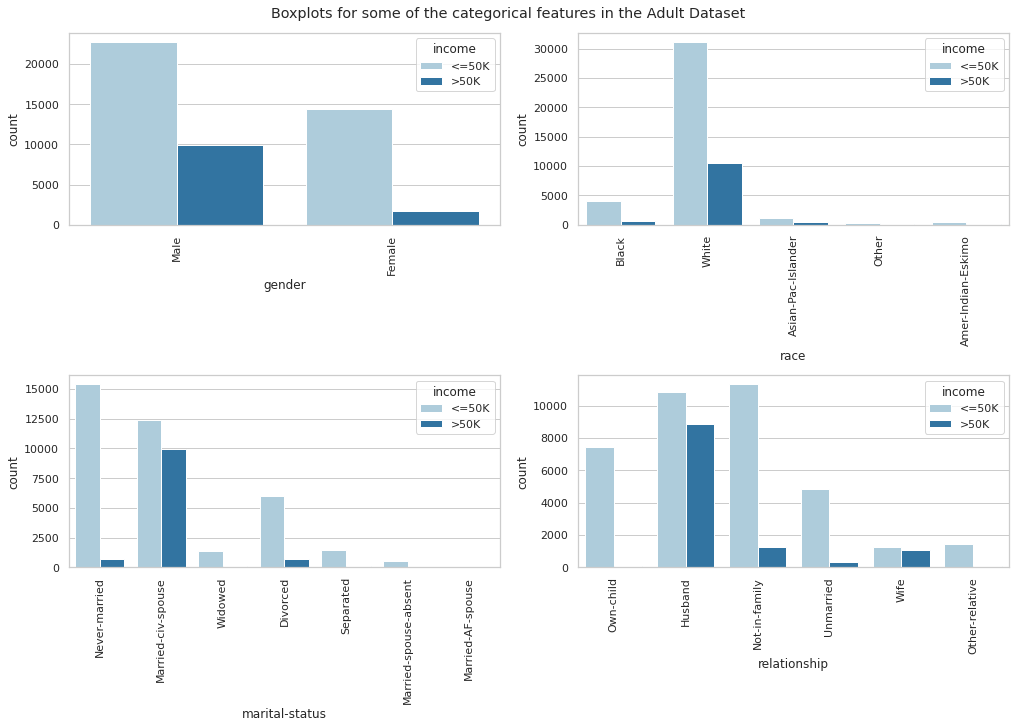

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
total = float(len(adult_df))

fig.suptitle('Boxplots for some of the categorical features in the Adult Dataset')

sns.countplot(ax=axes[0,0], x="gender", hue="income", data=adult_df)
sns.countplot(ax=axes[0,1], x="race", hue="income", data=adult_df)
sns.countplot(ax=axes[1,0], x="marital-status", hue="income", data=adult_df)
sns.countplot(ax=axes[1,1], x="relationship", hue="income", data=adult_df,)

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

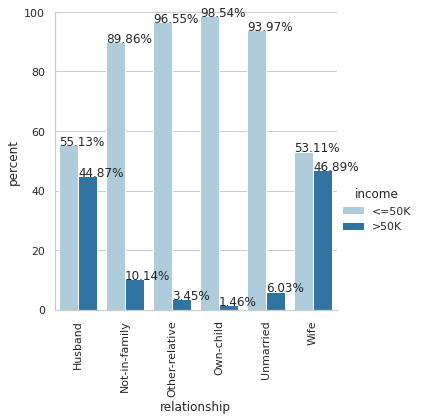

In [27]:
x,y = 'relationship', 'income'

df1 = adult_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

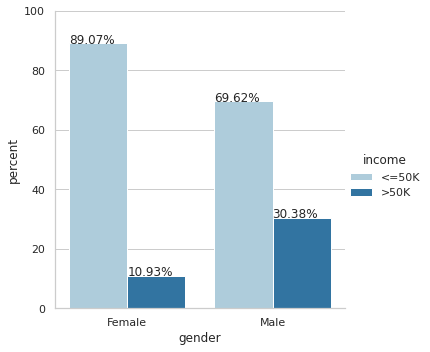

In [28]:
x,y = 'gender', 'income'

df1 = adult_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

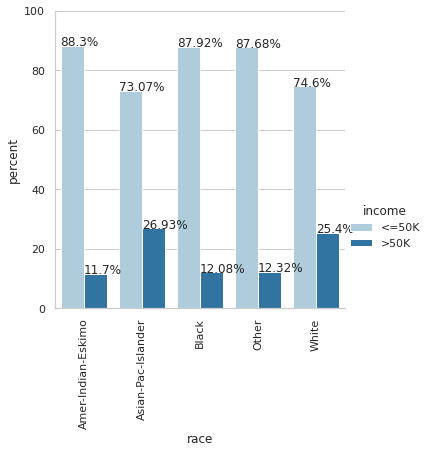

In [29]:
x,y = 'race', 'income'

df1 = adult_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

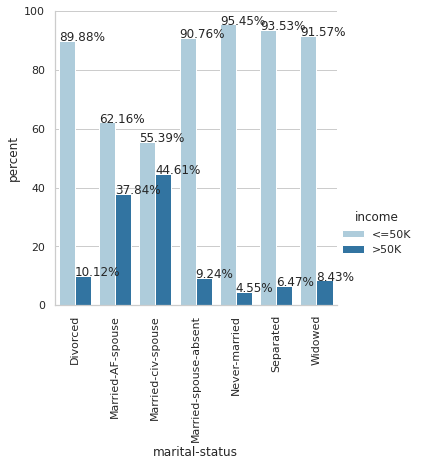

In [30]:
x,y = 'marital-status', 'income'

df1 = adult_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

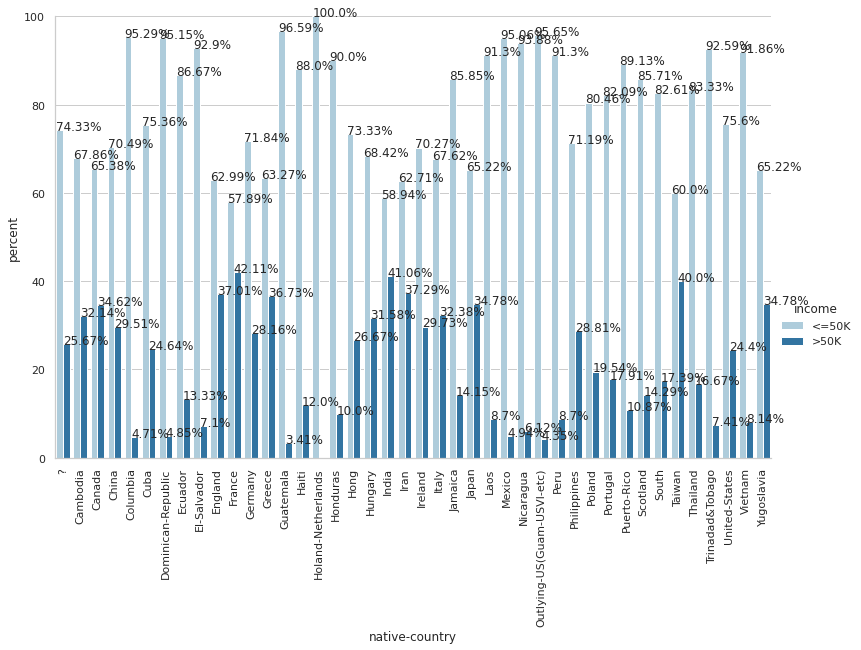

In [31]:
x,y = 'native-country', 'income'

df1 = adult_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7,aspect=11/7)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


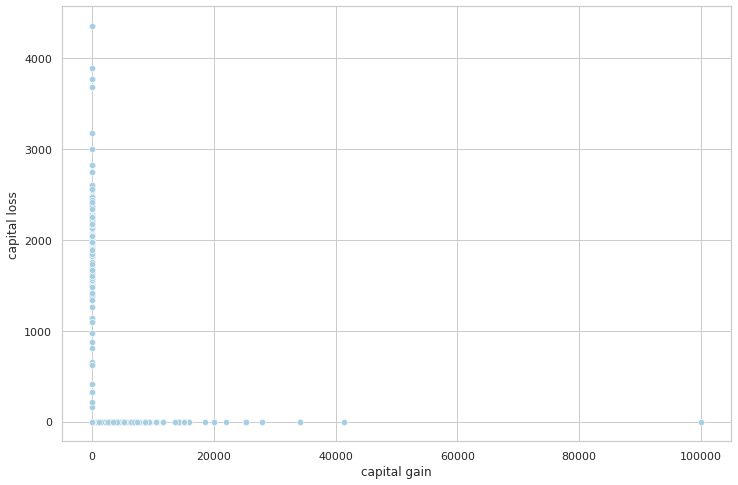

In [32]:
sns.scatterplot('capital-gain','capital-loss', data= adult_df)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

In [33]:
# capital gain/loss are directly linked in that if one is zero the other is usually high
# it may be useful to create a feature of capital change to sum up this relationship
adult_df["capital-change"] = adult_df["capital-gain"] - adult_df["capital-loss"]
adult_df["capital-change"].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-change, dtype: float64

## T-Test Hypothesis testing for continuous variables

In [34]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of income group >50k and income group <=50k.
# Alternate Hypothesis : there is difference in Mean of income group >50k and income group <=50k.

data = adult_df[(np.abs(stats.zscore(adult_df["hours-per-week"])) < 3)]

income_1 = data[adult_df['income']=='>50K']["hours-per-week"]
income_0 = data[adult_df['income']=='<=50K']["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 5.412308551381797
p value 1.8604542491160574e-07
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [35]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of income group >50k and 
# income group <=50k.
# Alternate Hypothesis : there is difference in Mean of income group >50k and
# income group <=50k.

data = adult_df[(np.abs(stats.zscore(adult_df["age"])) < 3)]

income_1 = data[adult_df['income']=='>50K']["age"]
income_0 = data[adult_df['income']=='<=50K']["age"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 2.5093913733144846
p value 0.013000925778851468
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [36]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of income group >50k and income group <=50k.
# Alternate Hypothesis : there is difference in Mean of income group >50k and income group <=50k.

data = adult_df[(np.abs(stats.zscore(adult_df["capital-gain"])) < 3)]

income_1 = data[adult_df['income']=='>50K']["capital-gain"]
income_0 = data[adult_df['income']=='<=50K']["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.9817149802083414
p value 0.0001243257757883815
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of income group >50k and income group <=50k.
# Alternate Hypothesis : there is difference in Mean of income group >50k and income group <=50k.

data = adult_df[(np.abs(stats.zscore(adult_df["capital-loss"])) < 3)]

income_1 = data[adult_df['income']=='>50K']["capital-loss"]
income_0 = data[adult_df['income']=='<=50K']["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest nan
p value nan
we accept null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [38]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of income group >50k and income group <=50k.
# Alternate Hypothesis : there is difference in Mean of income group >50k and income group <=50k.

data = adult_df[(np.abs(stats.zscore(adult_df["capital-change"])) < 3)]

income_1 = data[adult_df['income']=='>50K']["capital-change"]
income_0 = data[adult_df['income']=='<=50K']["capital-change"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 2.9318759270354153
p value 0.0041305864001985465
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Chi-Squared Hypothesis testing for categorical varibles

In [39]:
# contingency table for gender
c_t = pd.crosstab(adult_df['gender']
                  .sample(frac=0.002, replace=True, random_state=1),adult_df['income']
                  .sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
gender,,
Female,24,4
Male,47,23


In [40]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between gender and income.
# Alternate Hypothesis: There is a relationship between gender and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=1
p_value 0.10767430811439983
[[20.28571429  7.71428571]
 [50.71428571 19.28571429]]
probability=0.950, critical=3.841, stat=2.588
Independent (accept null hypothesis, H0)


In [41]:
# contingency table for marital-status
c_t = pd.crosstab(adult_df['marital-status'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
marital-status,,
Divorced,6,0
Married-civ-spouse,28,23
Never-married,31,3
Separated,1,1
Widowed,5,0


In [42]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between marital status and income.
# Alternate Hypothesis: There is a relationship between marital status and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=4
p_value 0.0009723128666570135
[[ 4.34693878  1.65306122]
 [36.94897959 14.05102041]
 [24.63265306  9.36734694]
 [ 1.44897959  0.55102041]
 [ 3.62244898  1.37755102]]
probability=0.950, critical=9.488, stat=18.529
Dependent (reject H0)


In [43]:
# contingency table for race
c_t = pd.crosstab(adult_df['race'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
race,,
Asian-Pac-Islander,5,0
Black,6,1
Other,1,0
White,59,26


In [44]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between race and income.
# Alternate Hypothesis: There is a relationship between race and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=3
p_value 0.3488098500127964
[[ 3.62244898  1.37755102]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [61.58163265 23.41836735]]
probability=0.950, critical=7.815, stat=3.292
Independent (accept null hypothesis, H0)


In [45]:
# contingency table for native-country
c_t = pd.crosstab(adult_df['native-country'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
native-country,,
?,1,0
China,1,0
Cuba,1,0
Dominican-Republic,1,0
Germany,1,0
India,2,0
Jamaica,1,0
Philippines,1,0
South,1,0


In [46]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between native country and income.
# Alternate Hypothesis: There is a relationship between native country and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=9
p_value 0.8952788832899479
[[ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 1.44897959  0.55102041]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [63.75510204 24.24489796]]
probability=0.950, critical=16.919, stat=4.235
Independent (accept null hypothesis, H0)


In [47]:
# contingency table for workclass
c_t = pd.crosstab(adult_df['workclass'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
workclass,,
?,3,1
Federal-gov,2,1
Local-gov,6,1
Private,51,20
Self-emp-inc,2,1
Self-emp-not-inc,4,3
State-gov,3,0


In [48]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between work class and income.
# Alternate Hypothesis: There is a relationship between work class and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=6
p_value 0.8446574423258142
[[ 2.89795918  1.10204082]
 [ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [51.43877551 19.56122449]
 [ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [ 2.17346939  0.82653061]]
probability=0.950, critical=12.592, stat=2.707
Independent (accept null hypothesis, H0)


In [49]:
# contingency table for education
c_t = pd.crosstab(adult_df['education'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
education,,
10th,3,0
11th,7,0
12th,1,0
9th,1,0
Assoc-acdm,4,1
Assoc-voc,4,4
Bachelors,9,7
Doctorate,0,2
HS-grad,27,6


In [50]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between education and income.
# Alternate Hypothesis: There is a relationship between education and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=10
p_value 0.022830136196534293
[[ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 3.62244898  1.37755102]
 [ 5.79591837  2.20408163]
 [11.59183673  4.40816327]
 [ 1.44897959  0.55102041]
 [23.90816327  9.09183673]
 [ 4.34693878  1.65306122]
 [11.59183673  4.40816327]]
probability=0.950, critical=18.307, stat=20.760
Dependent (reject H0)


In [51]:
# contingency table for occupation
c_t = pd.crosstab(adult_df['occupation'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
occupation,,
?,3,1
Adm-clerical,9,3
Craft-repair,9,2
Exec-managerial,6,7
Farming-fishing,1,0
Handlers-cleaners,5,0
Machine-op-inspct,4,1
Other-service,8,0
Prof-specialty,7,6


In [52]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between occupation and income.
# Alternate Hypothesis: There is a relationship between occupation and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=12
p_value 0.27045141136552187
[[ 2.89795918  1.10204082]
 [ 8.69387755  3.30612245]
 [ 7.96938776  3.03061224]
 [ 9.41836735  3.58163265]
 [ 0.7244898   0.2755102 ]
 [ 3.62244898  1.37755102]
 [ 3.62244898  1.37755102]
 [ 5.79591837  2.20408163]
 [ 9.41836735  3.58163265]
 [ 1.44897959  0.55102041]
 [11.59183673  4.40816327]
 [ 1.44897959  0.55102041]
 [ 4.34693878  1.65306122]]
probability=0.950, critical=21.026, stat=14.491
Independent (accept null hypothesis, H0)


In [53]:
# contingency table for relationship
c_t = pd.crosstab(adult_df['relationship'].sample(frac=0.002, replace=True, random_state=1),adult_df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
relationship,,
Husband,25,19
Not-in-family,18,3
Other-relative,2,0
Own-child,14,0
Unmarried,10,1
Wife,2,4


In [54]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between relationship and income.
# Alternate Hypothesis: There is a relationship between relationship and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=5
p_value 0.0013631817394203864
[[31.87755102 12.12244898]
 [15.21428571  5.78571429]
 [ 1.44897959  0.55102041]
 [10.14285714  3.85714286]
 [ 7.96938776  3.03061224]
 [ 4.34693878  1.65306122]]
probability=0.950, critical=11.070, stat=19.799
Dependent (reject H0)


## Multivariate Relationships

In [55]:
# Correlation among the numeric variables heatmap (requires pre-processing)